<h1>Illia Voronov</h1>

<p>
    Goal: get knowledge and skills in digital image processing with OpenCV library
    and processing of a bunch of digital images.
</p>

<h3>Task 1.</h3>
<p>1) Create a function that takes the path to a folder on disk as an argument and
returns a dataframe with the following information about the images in the folder:
</p>
<ul>
    <li> file name;</li>
    <li> color model;</li>
    <li> format;</li>
    <li> the number of channels in the image;</li>
    <li> file size in megabytes, rounded to two decimal places;</li>
    <li> image width;</li>
    <li> image height;</li>
    <li> full path to the file;</li>
    <li> image thumbnail</li>
</ul>

In [122]:
import os
import glob
import cv2
import pandas as pd
from PIL import Image
from IPython.display import display

folder_path = "images2/"
file_path = "images2/1.png"

def get_image_info(folder_path):
    data = []
    for file_path in glob.glob(os.path.join(folder_path, "*")):
        try:
            img = Image.open(file_path)
            file_info = {
                "File Name": os.path.basename(file_path),
                "Color Model": img.mode,
                "Format": img.format,
                "Channels": len(img.getbands()),
                "File Size (MB)": round(os.path.getsize(file_path) / (1024 * 1024), 2),
                "Width": img.width,
                "Height": img.height,
                "Full Path": file_path,
                "Thumbnail": img.copy().thumbnail((50, 50))
            }
            data.append(file_info)
        except Exception:
            continue
    
    df = pd.DataFrame(data)
    

    from IPython.core.display import HTML
    def image_html(img):
        img.thumbnail((50, 50))
        return f"<img src='{img.fp}' style='height:50;' />"
    
    pd.set_option('display.max_colwidth', None)
    df["Thumbnail"] = df["Full Path"].apply(lambda x: f'<img src="{x}" style="width:150px;height:auto">')
    display(HTML(df.to_html(escape=False)))
    return df


df = get_image_info(folder_path)


,File Name,Color Model,Format,Channels,File Size (MB),Width,Height,Full Path,Thumbnail
0,mouth.jpg,RGB,JPEG,3,0.02,490,360,images2/mouth.jpg,
1,nose.jpg,RGB,JPEG,3,0.03,912,980,images2/nose.jpg,
2,Mustache.jpg,L,JPEG,1,0.01,612,612,images2/Mustache.jpg,
3,cartoon-ear-600nw-746814979.webp,RGB,WEBP,3,0.01,600,600,images2/cartoon-ear-600nw-746814979.webp,
4,eye.jpg,RGB,JPEG,3,0.06,980,980,images2/eye.jpg,


<h3>Task 2.</h3>
<p>Create a poster from the images in the folder using the OpenCV library.</p>
<ol>
    <li>
     Create a function that takes following arguments:
    <ul>
        <li>
             the path to the folder;
        </li>
        <li>
             name of output image file;
        </li>
        <li>
             the number of images in a row;
        </li>
        <li>
             the number of images in a column
            and returns the poster image.
        </li>
    </ul>
    <p>We assume that the poster is rectangular and the number of pictures in the poster is
    a x b, where a is the number of columns and b is the number of rows.</p>
    </li>
    <li>
     Create a function that converts the picture into a square with the maximum
    possible side size (for example, for the picture 800x533, the output size should be
    533x533). We crop image on both sides, that is, we calculate the size from the
    image center.
    </li>
    <li>
     All pictures from which the poster is created must be of the same size, that is,
    after cropping, the size must be changed, for example, by 500x500.
    </li>
    <li>
     To add images to poster, pick them randomly. Pictures may be repeated.
    </li>
    <li>
     "Filter" the image with red, green, blue, yellow, magenta, or cyan colors, which
    are also randomly selected and may repeat.
    </li>
    <li>
     Provide 3-4 versions of posters saved in files on disk.
    </li>
</ol>

Poster saved as images2/posters/poster1.jpg
Poster saved as images2/posters/poster2.jpg
Poster saved as images2/posters/poster3.jpg



images2/posters/poster1.jpg


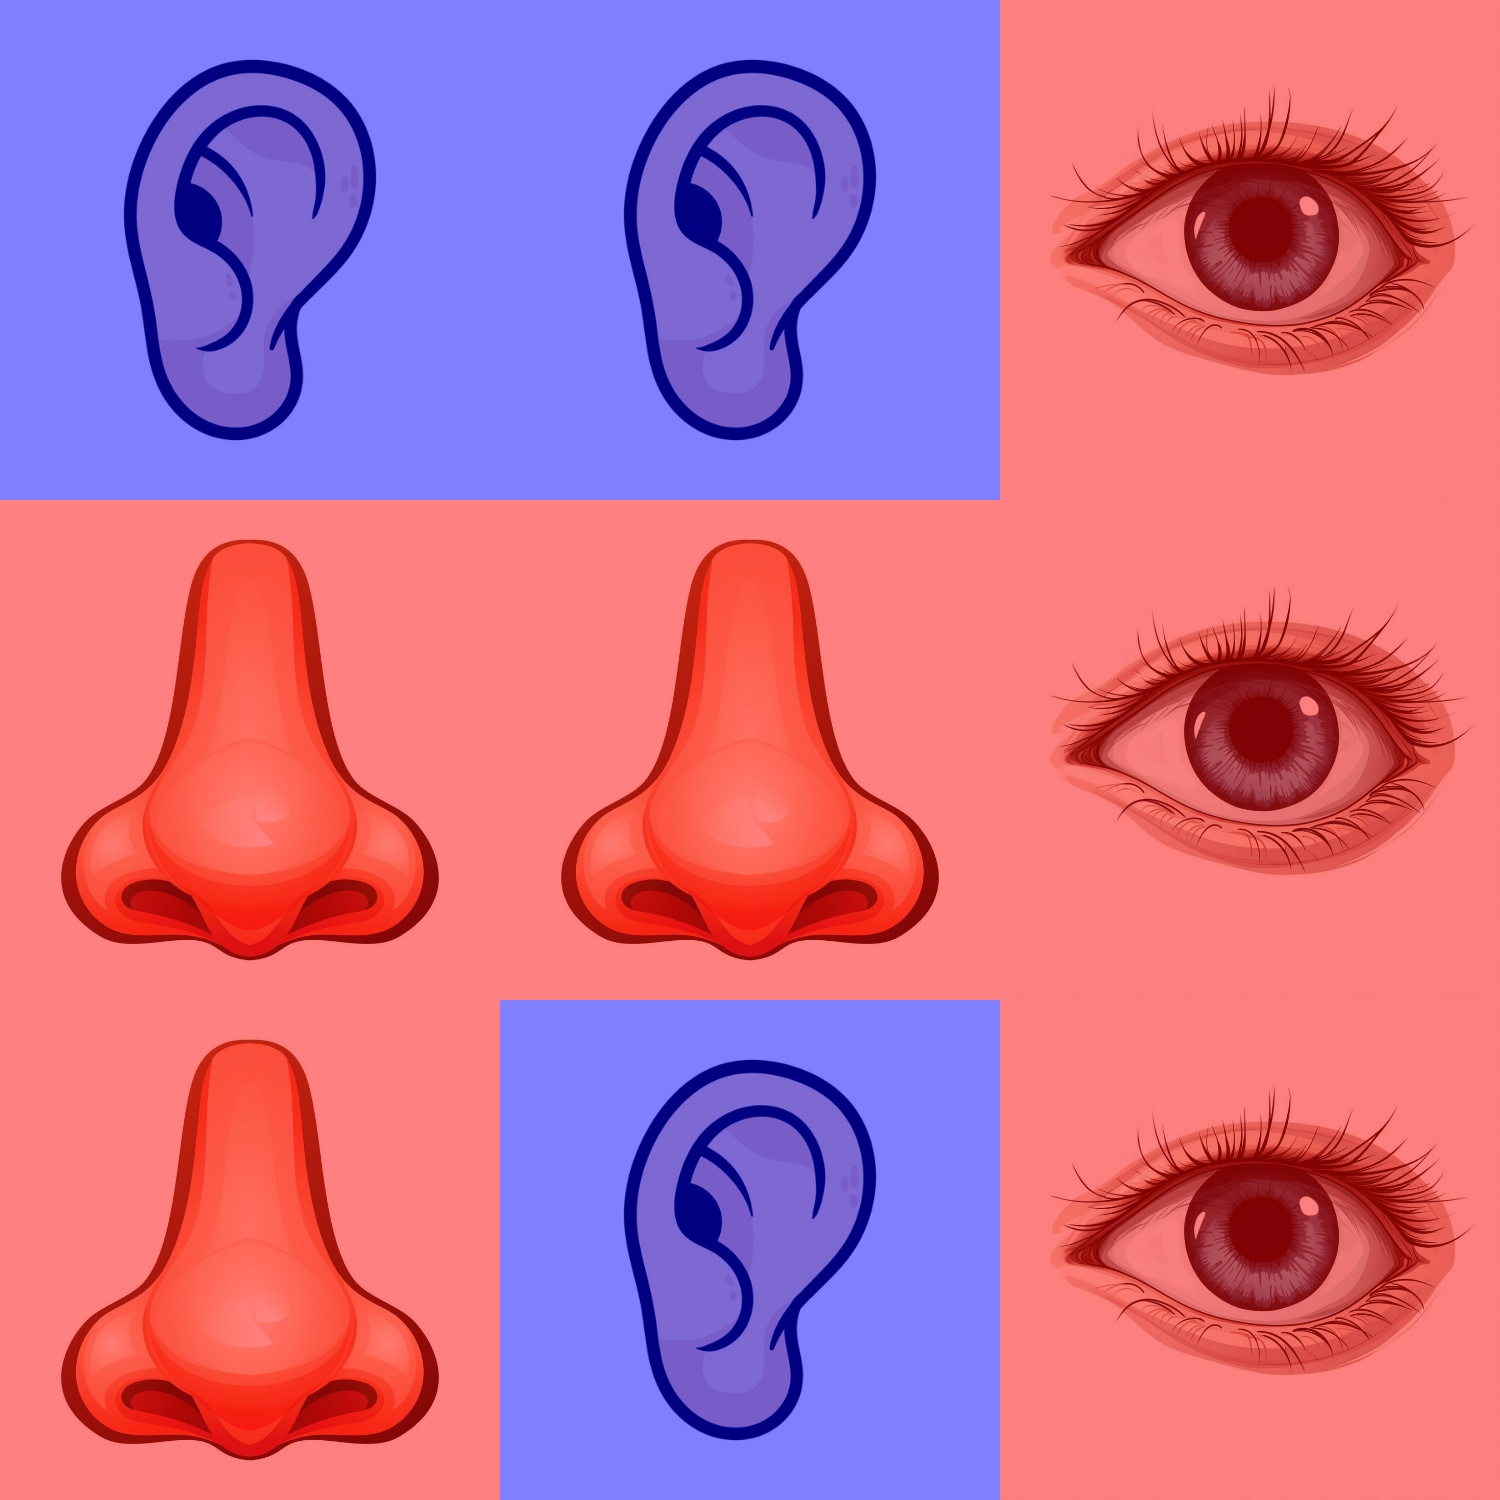




images2/posters/poster2.jpg


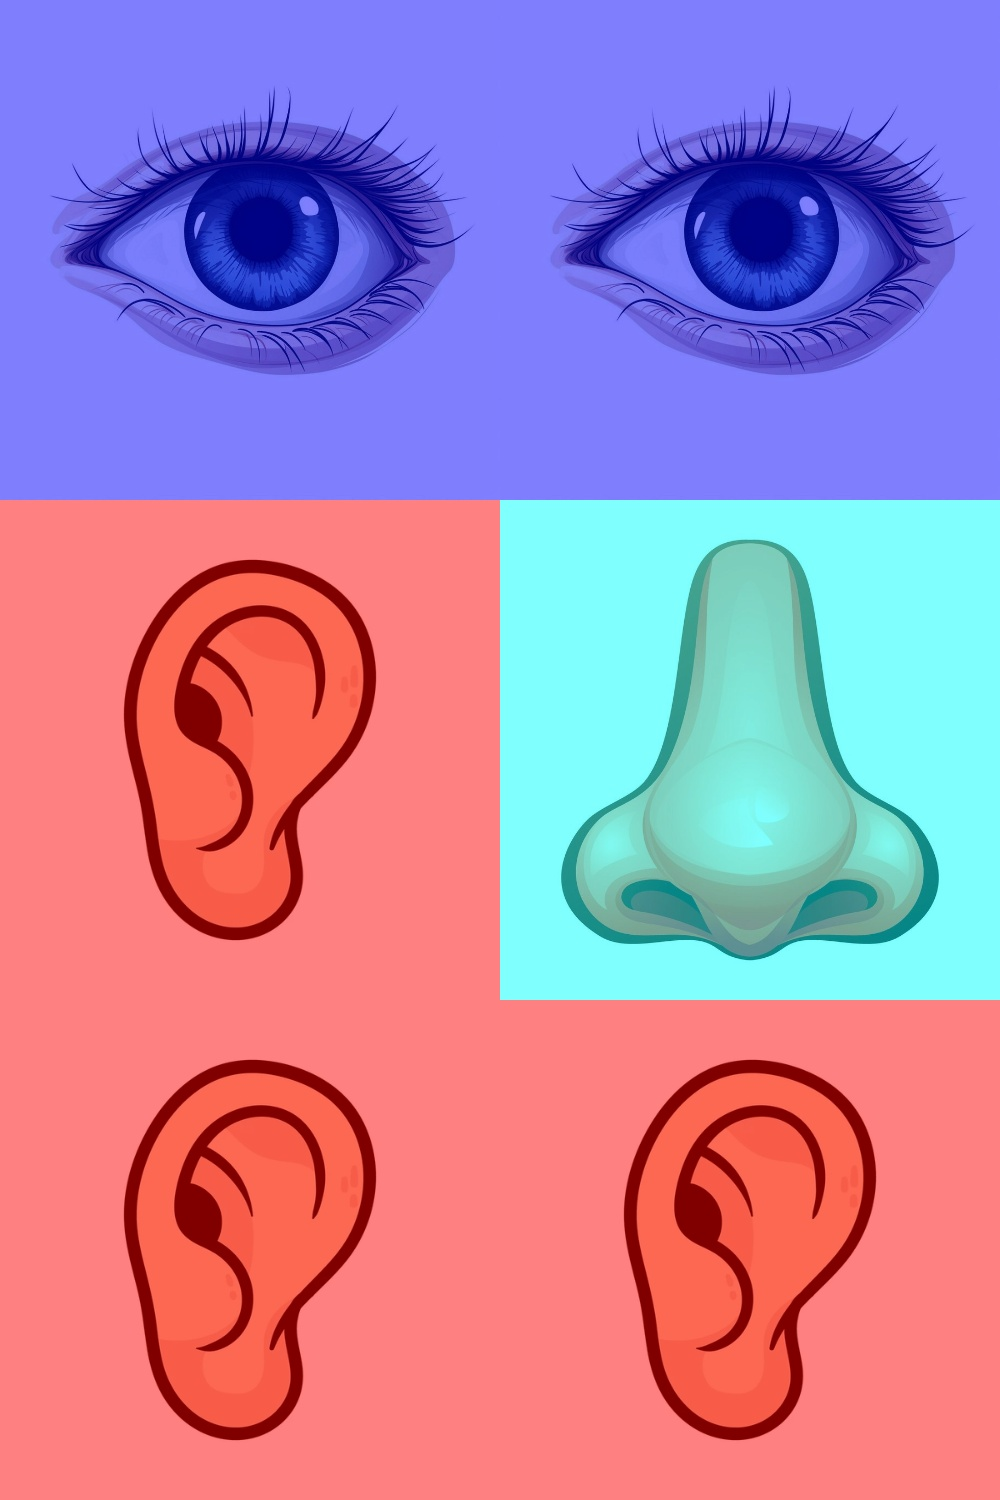




images2/posters/poster3.jpg


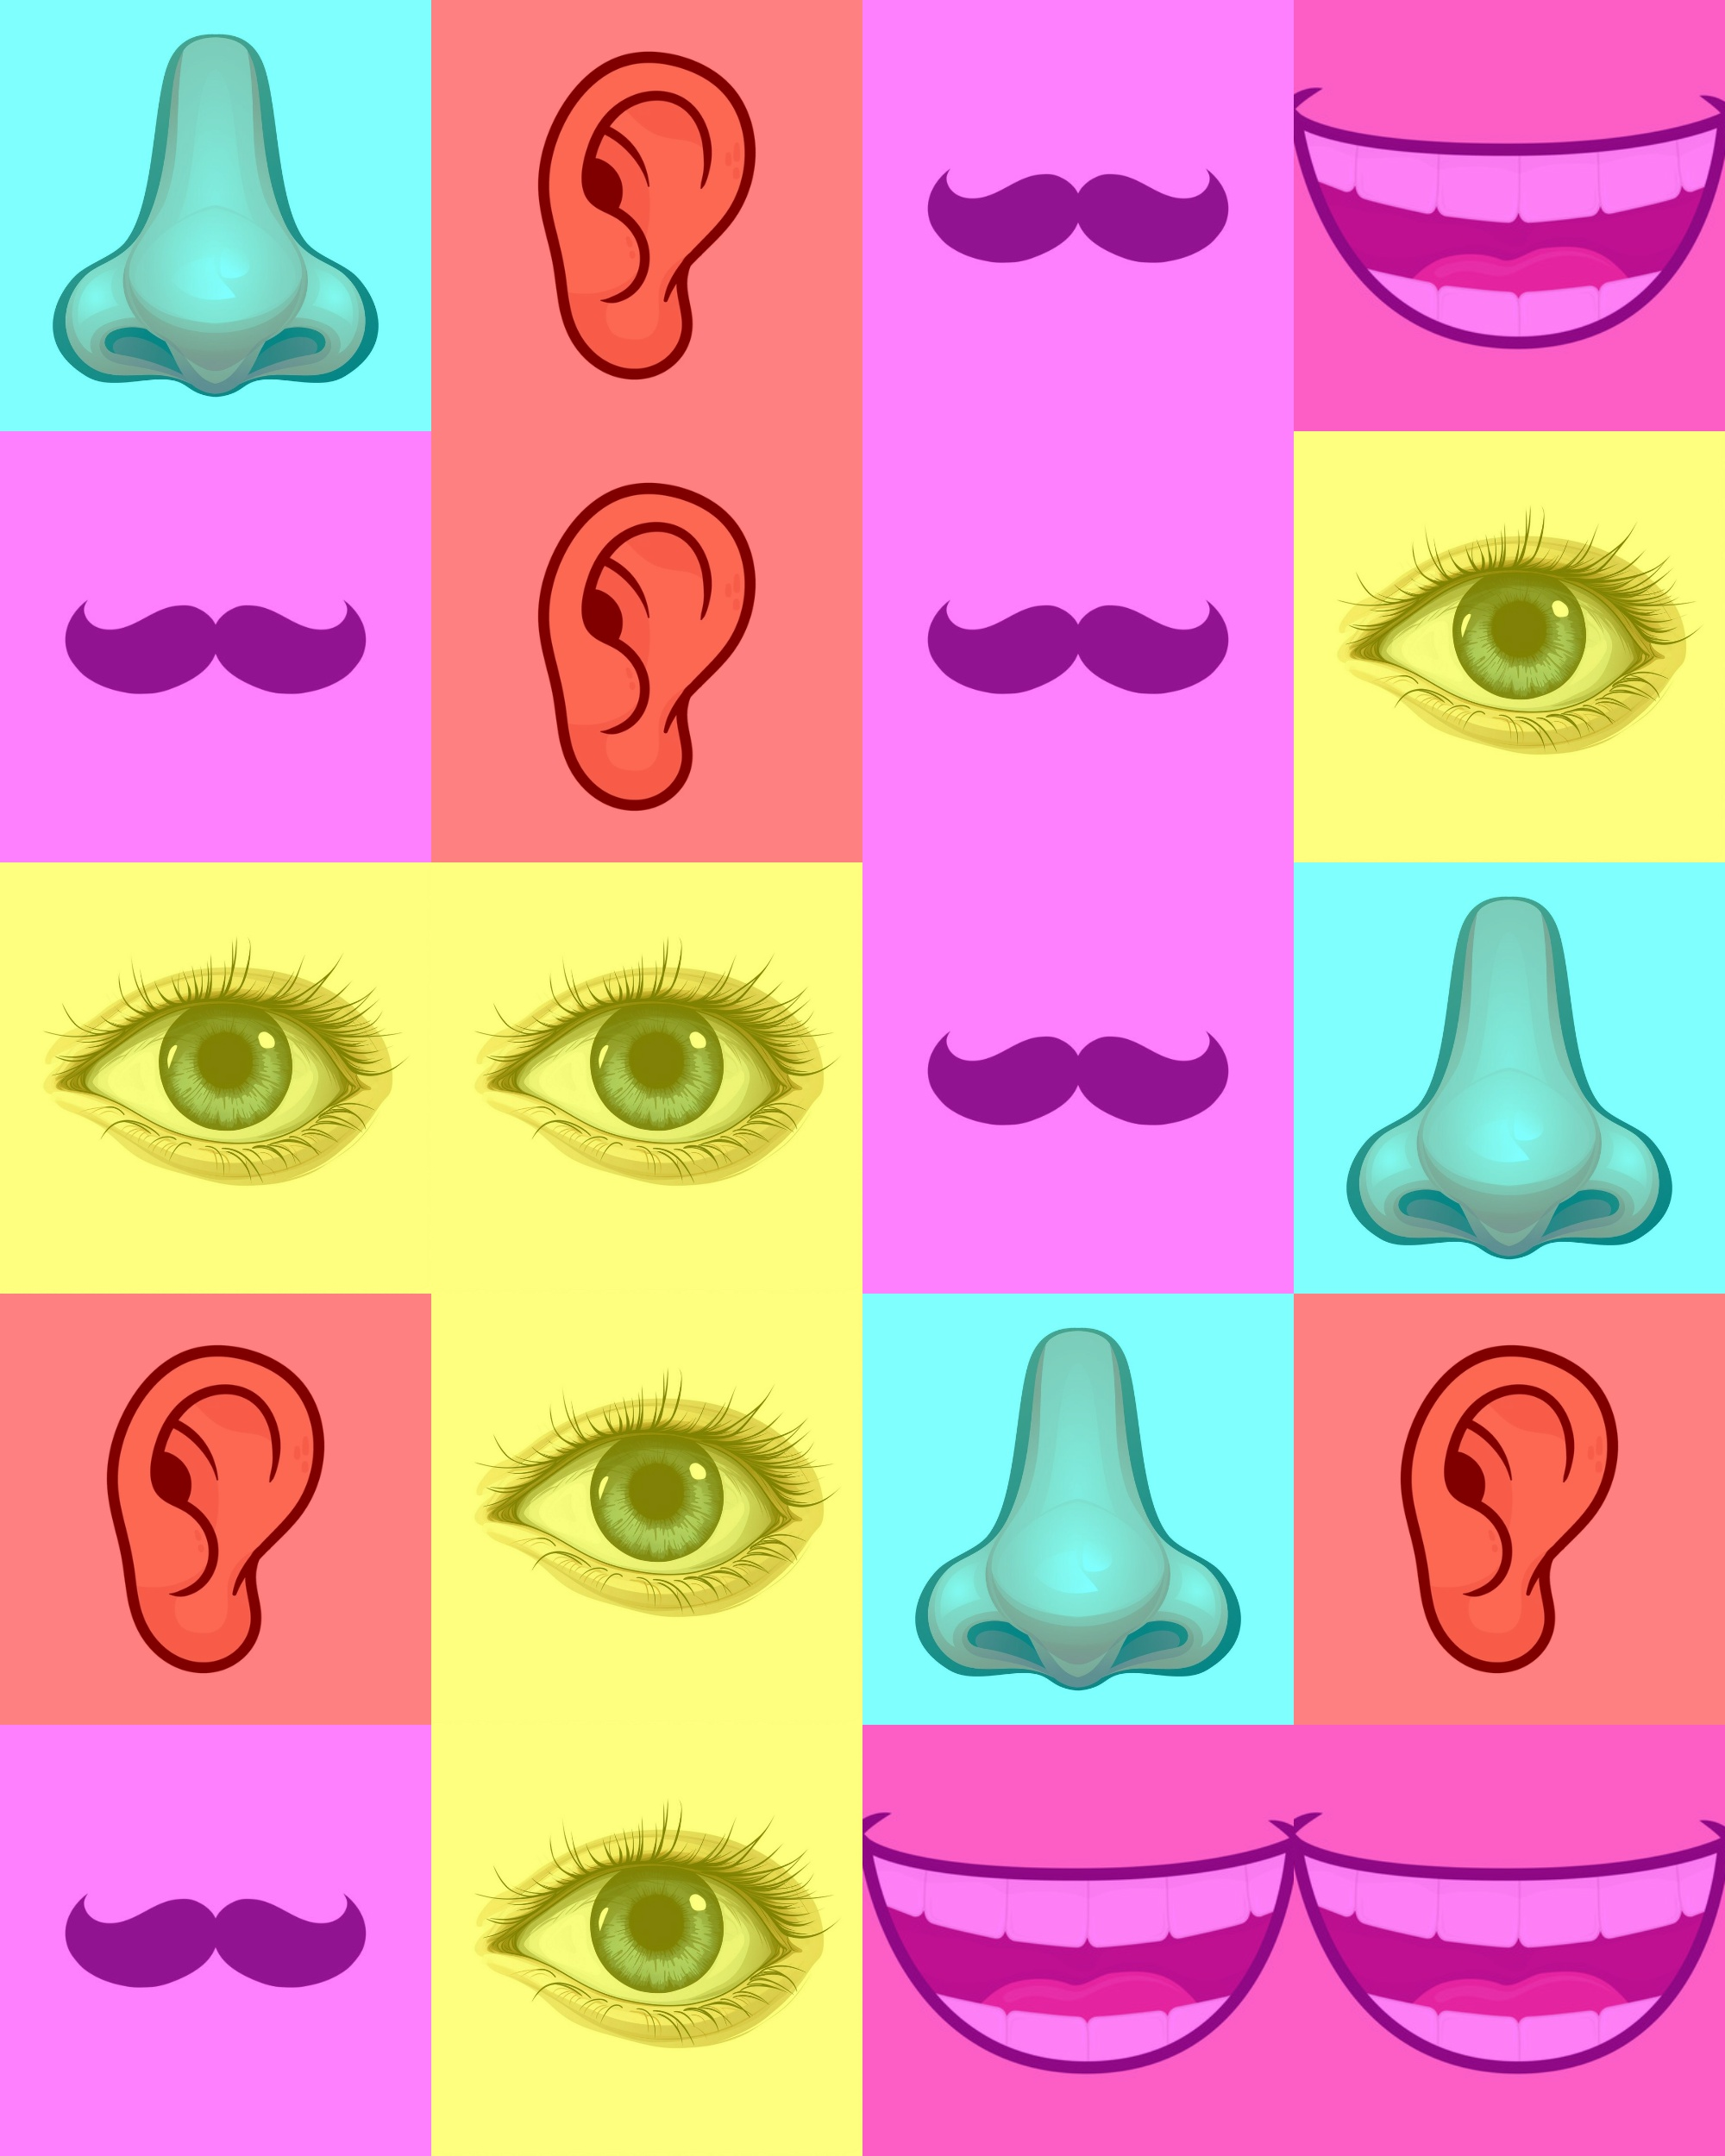

In [115]:
import random
import numpy as np
from IPython.display import Image, display

def create_square_image(img, size=500):
    h, w = img.shape[:2]
    min_dim = min(h, w)
    center = (w // 2, h // 2)
    cropped_img = img[center[1] - min_dim // 2:center[1] + min_dim // 2,
                      center[0] - min_dim // 2:center[0] + min_dim // 2]
    resized_img = cv2.resize(cropped_img, (size, size))
    return resized_img

def apply_random_filter(img):
    filters = {
        "red": (0, 0, 255),
        "green": (0, 255, 0),
        "blue": (255, 0, 0),
        "yellow": (0, 255, 255),
        "magenta": (255, 0, 255),
        "cyan": (255, 255, 0)
    }
    color = random.choice(list(filters.values()))
    overlay = np.zeros_like(img, dtype=np.uint8)
    overlay[:] = color
    filtered_img = cv2.addWeighted(img, 0.5, overlay, 0.5, 0)
    return filtered_img

def create_poster(folder_path, output_name, rows, cols, img_size=500):

    images = []
    for file_path in glob.glob(os.path.join(folder_path, "*")):
        try:
            img = cv2.imread(file_path)
            square_img = create_square_image(img, size=img_size)
            filtered_img = apply_random_filter(square_img)
            images.append(filtered_img)
        except Exception:
            continue
    
    if not images:
        print("No valid images found.")
        return


    poster = []
    for _ in range(rows):
        row = [random.choice(images) for _ in range(cols)]
        poster.append(np.hstack(row))
    
    poster_image = np.vstack(poster)
    cv2.imwrite(output_name, poster_image)
    print(f"Poster saved as {output_name}")

folder_path = "images2/"
create_poster(folder_path, "images2/posters/poster1.jpg", 3, 3)
create_poster(folder_path, "images2/posters/poster2.jpg", 3, 2)
create_poster(folder_path, "images2/posters/poster3.jpg", 5, 4)

poster1_path = "images2/posters/poster1.jpg"
poster2_path = "images2/posters/poster2.jpg"
poster3_path = "images2/posters/poster3.jpg"
for poster_path in [poster1_path, poster2_path, poster3_path]:
    print("\n\n\n" + poster_path)
    display(Image(filename=poster_path))
